In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib


In [2]:
#Load the dataset
df = pd.read_csv('C:/Users/vikra/OneDrive/Documents/ocean-acidification-data.csv')

#Display the first few rows of the dataframe
print(df.head())

     year  Gas(TWh,direct energy)  Oil(TWh,direct energy)  \
0  1950.0                  2092.0                  5444.0   
1  1951.0                  2200.0                  6000.0   
2  1952.0                  2400.0                  6500.0   
3  1953.0                  2600.0                  7000.0   
4  1954.0                  2700.0                  7500.0   

   Cole(TWh,direct energy)  Nuclear (% direct primary energy)  \
0                  12603.0                                0.5   
1                  12800.0                                0.5   
2                  13000.0                                0.5   
3                  13200.0                                0.5   
4                  13500.0                                0.5   

   Renewables (% direct primary energy)  \
0                                   1.0   
1                                   1.0   
2                                   1.0   
3                                   1.0   
4                          

In [3]:
#basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   year                                              74 non-null     float64
 1   Gas(TWh,direct energy)                            74 non-null     float64
 2   Oil(TWh,direct energy)                            74 non-null     float64
 3   Cole(TWh,direct energy)                           74 non-null     float64
 4   Nuclear (% direct primary energy)                 74 non-null     float64
 5   Renewables (% direct primary energy)              74 non-null     float64
 6   Fossil fuels (% direct primary energy)            74 non-null     float64
 7   Annual_GHG_emision_(in_billion_tons)              73 non-null     float64
 8   Global_average_temperature                        74 non-null     float64
 9   Global_warming_contribu

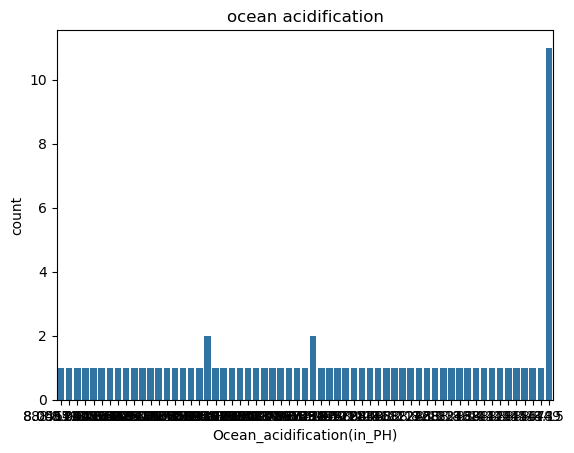

In [11]:
#univariate analysis
sns.countplot(x='Ocean_acidification(in_PH)', data=df)
plt.title('ocean acidification')
plt.show()

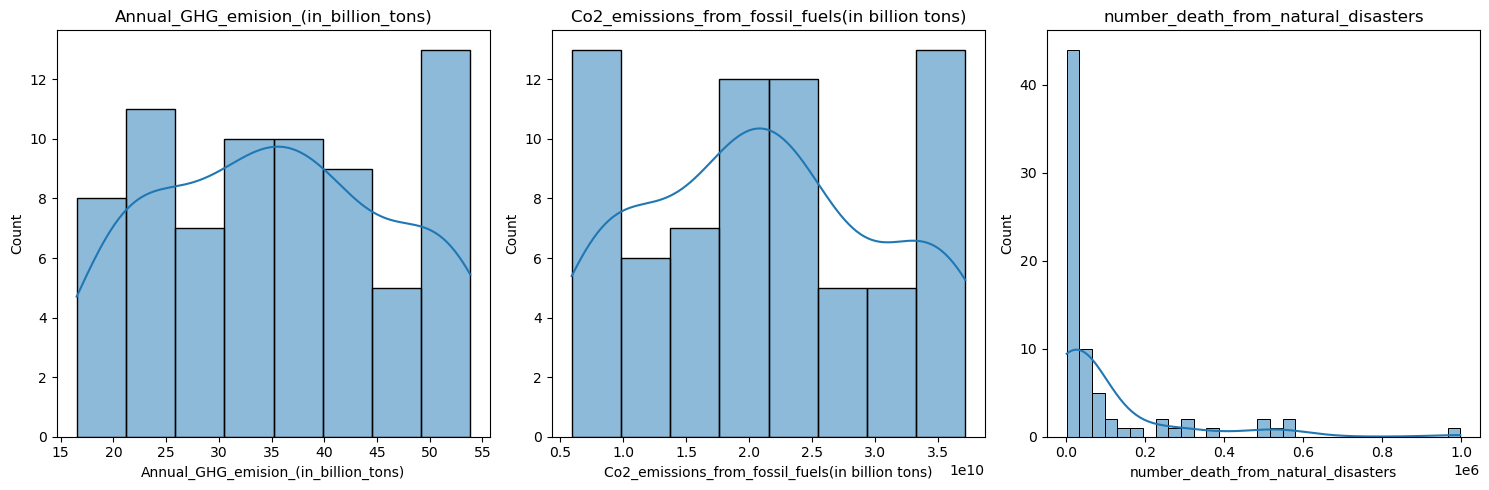

In [13]:
num_cols = ["Annual_GHG_emision_(in_billion_tons)", "Co2_emissions_from_fossil_fuels(in billion tons)", "number_death_from_natural_disasters"]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, col in zip(axs, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()


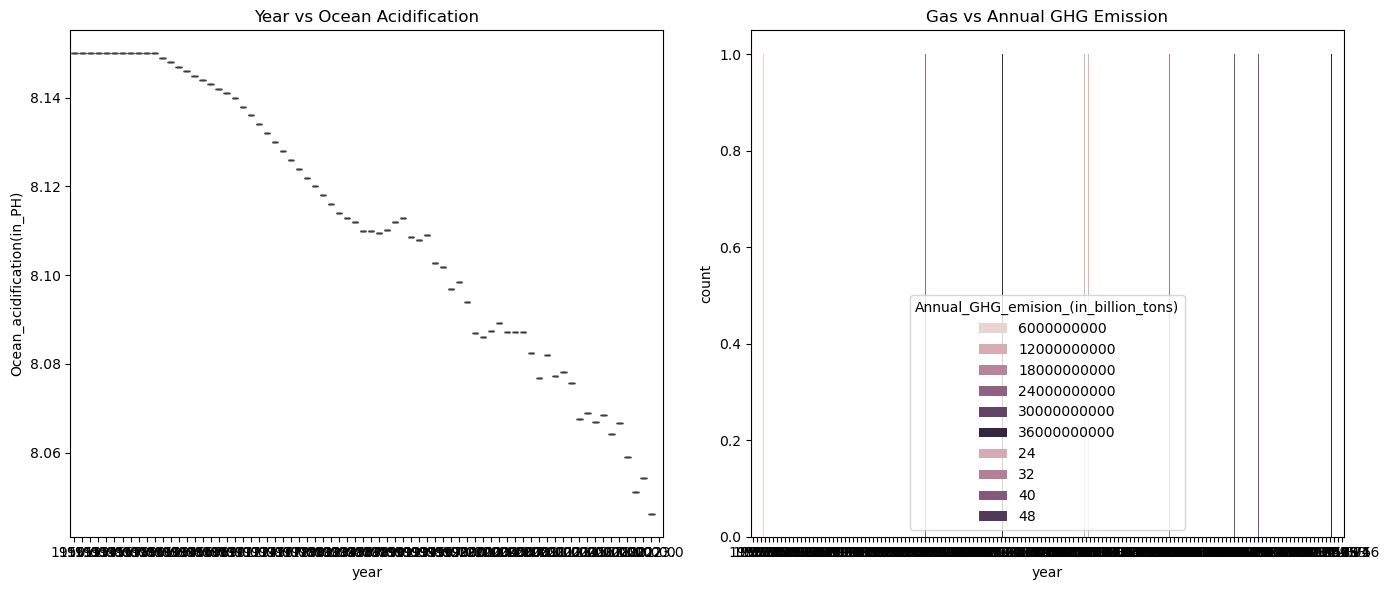

In [7]:
# Bivariate analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x = 'year', y = 'Ocean_acidification(in_PH)', data = df, ax=ax[0]).set_title('Year vs Ocean Acidification')
sns.countplot(x = 'year', hue = 'Co2_emissions_from_fossil_fuels(in billion tons)', data = df, ax=ax[1]).set_title('Year vs Co2 Emissions')
sns.countplot(x = 'Gas(TWh,direct energy)', hue = 'Annual_GHG_emision_(in_billion_tons)', data = df).set_title('Gas vs Annual GHG Emission')
plt.tight_layout()
plt.show()

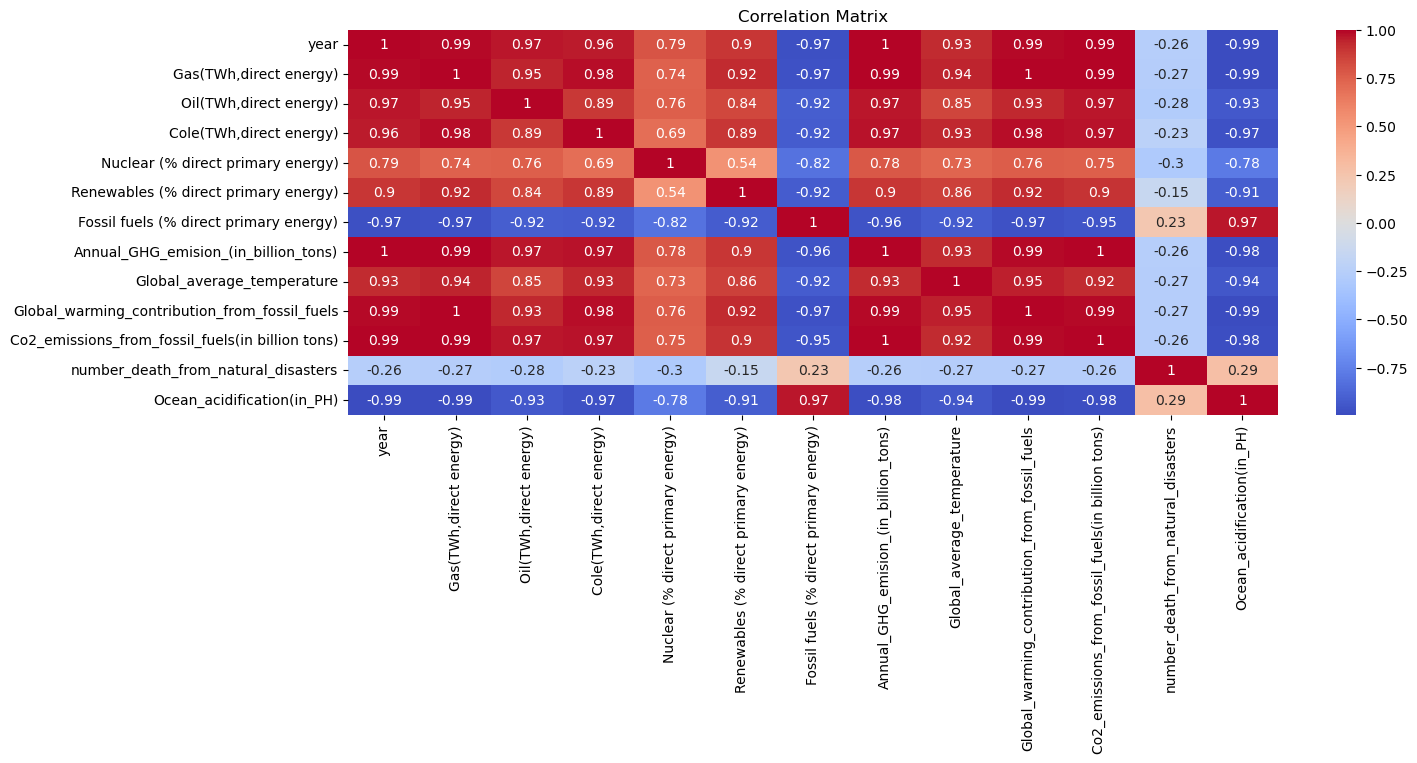

In [9]:
# Correlation matrix for numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

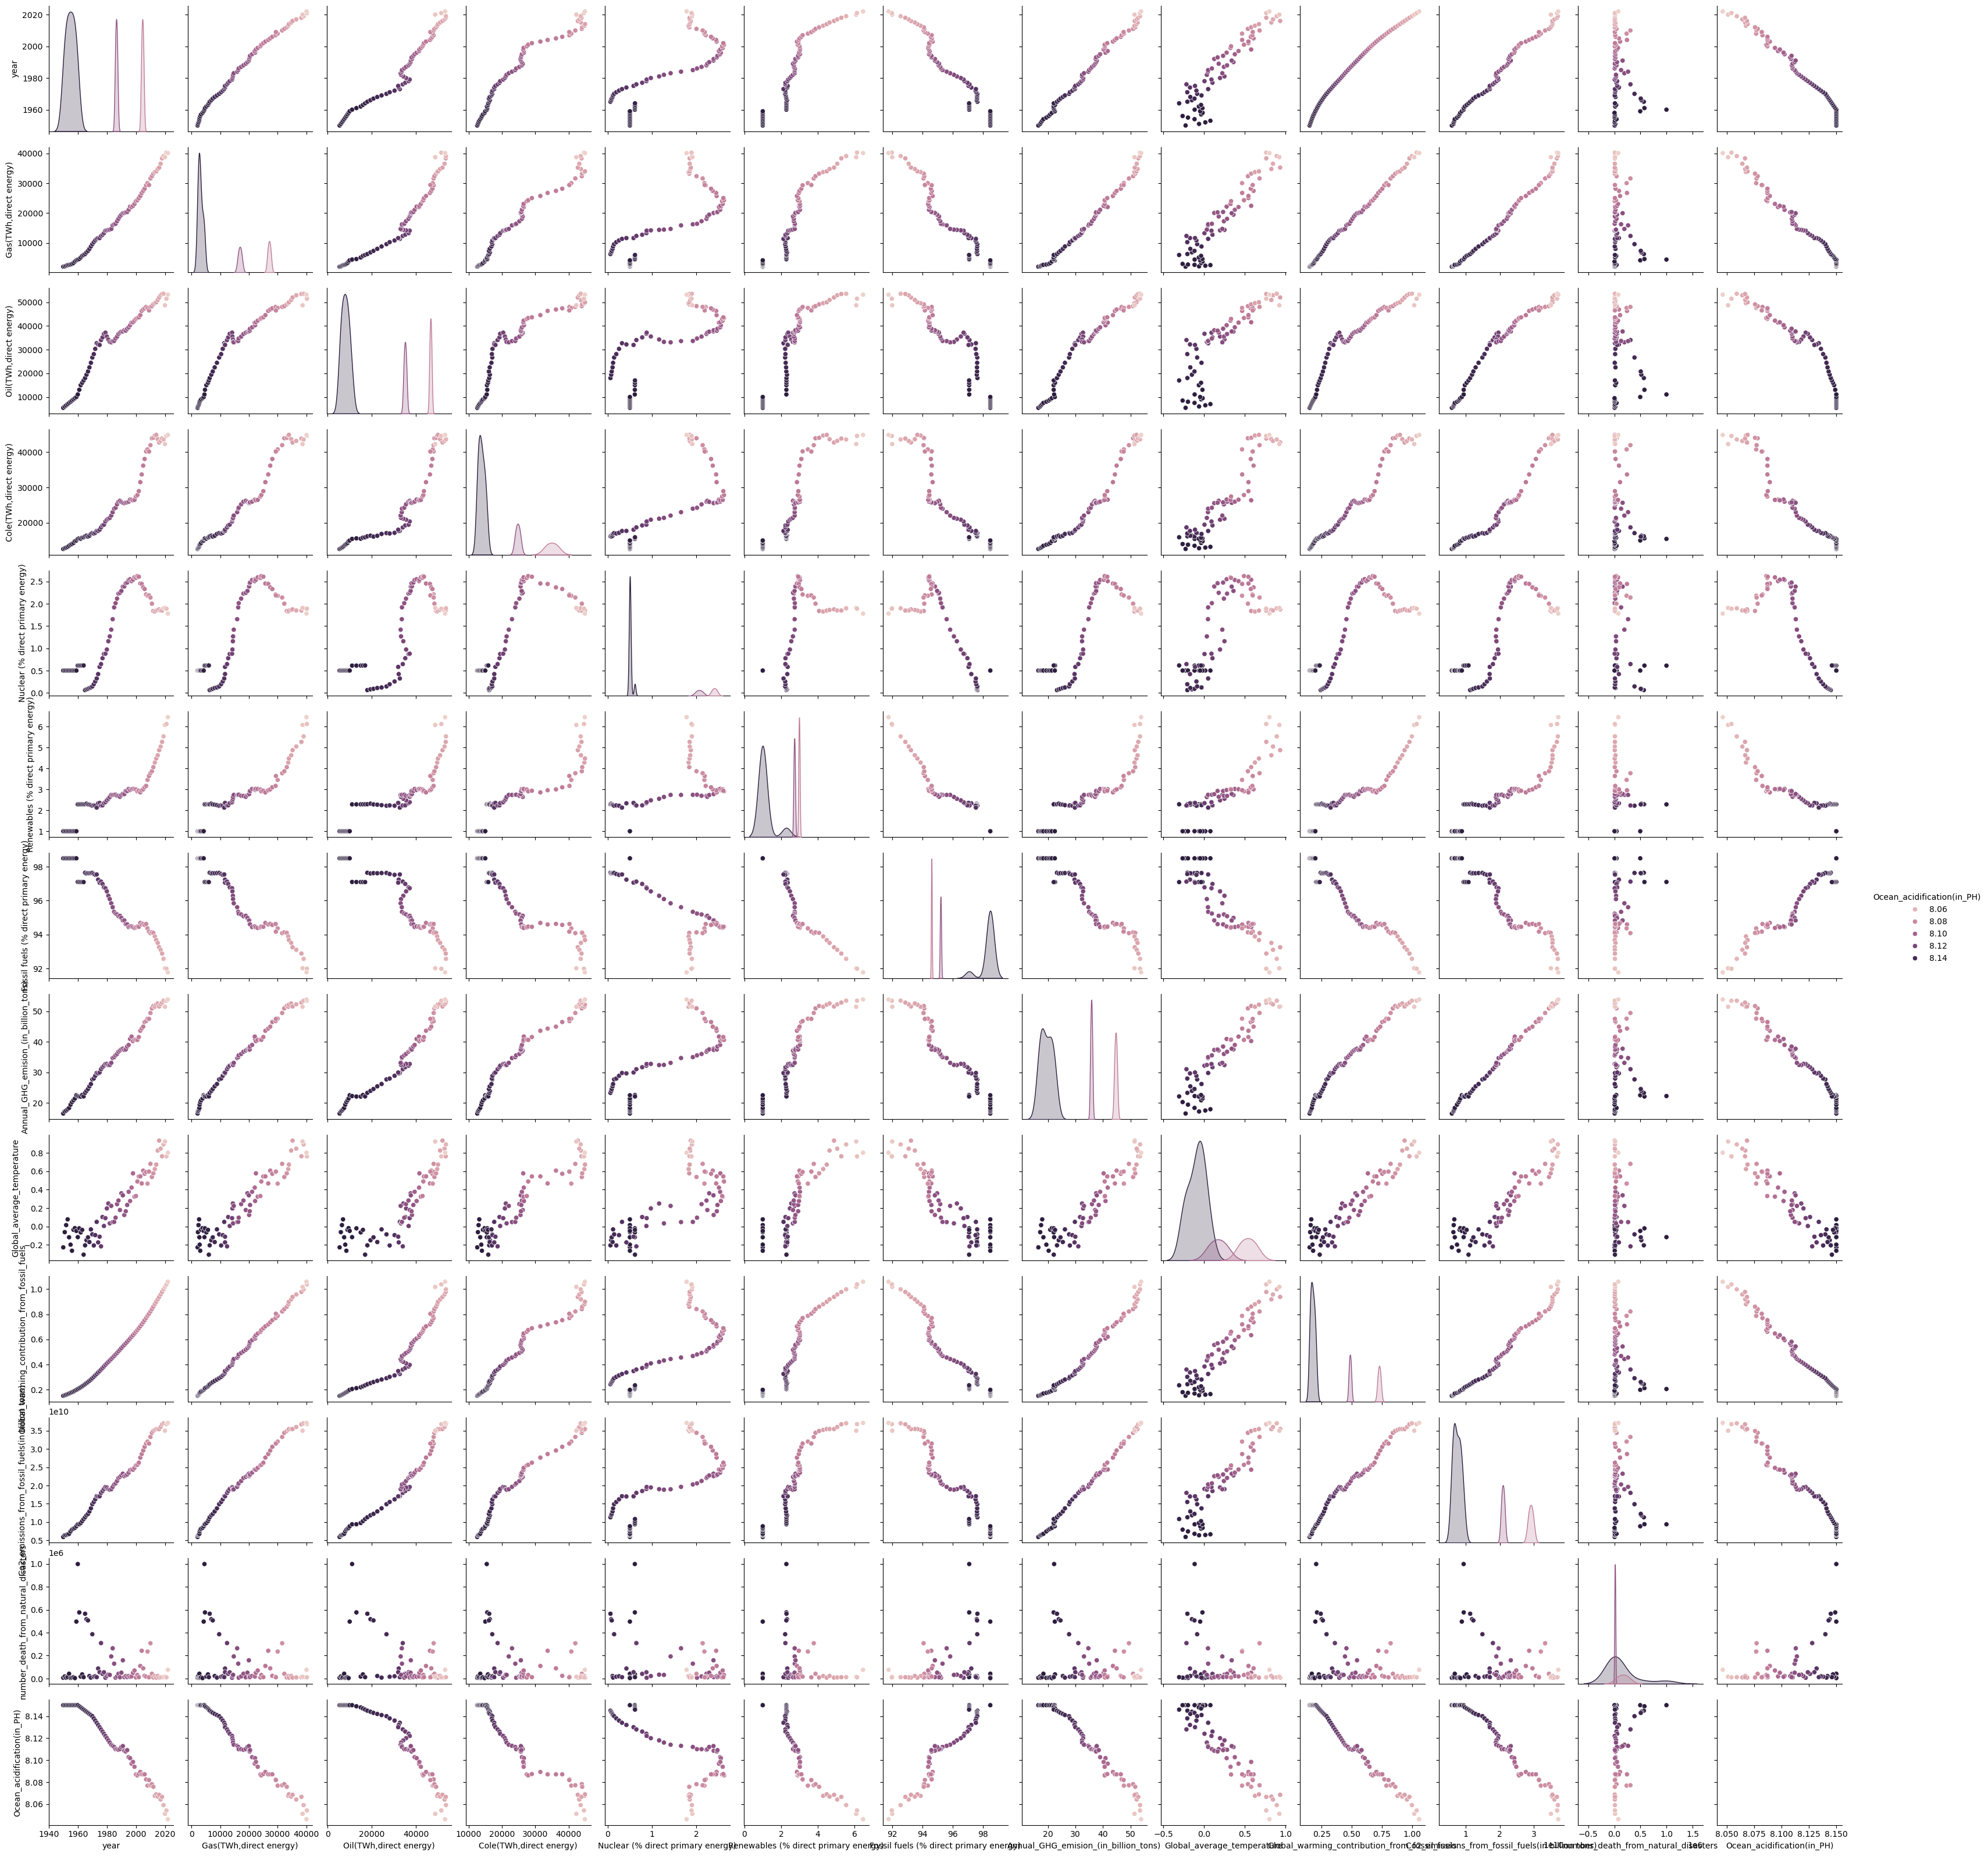

In [12]:
#pairplot of numerical features colored by Ocean acidification
sns.pairplot(df, vars=numeric_cols, hue='Ocean_acidification(in_PH)')
plt.show()

In [13]:
df.columns

Index(['year', 'Gas(TWh,direct energy)', 'Oil(TWh,direct energy)',
       'Cole(TWh,direct energy)', 'Nuclear (% direct primary energy)',
       'Renewables (% direct primary energy)',
       'Fossil fuels (% direct primary energy)',
       'Annual_GHG_emision_(in_billion_tons)', 'Global_average_temperature',
       'Global_warming_contribution_from_fossil_fuels',
       'Co2_emissions_from_fossil_fuels(in billion tons)',
       'number_death_from_natural_disasters', 'Ocean_acidification(in_PH)'],
      dtype='object')

In [14]:
# Data Preprocessing
# (No categorical columns in this dataset, so no LabelEncoder needed)

# Feature and target selection
# Example: predicting 'Global_average_temperature' as target
X = df.drop(['Global_average_temperature'], axis=1)
y = df['Ocean_acidification(in_PH)']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape
X_test.shape

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train


,year,"Gas(TWh,direct energy)","Oil(TWh,direct energy)","Cole(TWh,direct energy)",Nuclear (% direct primary energy),Renewables (% direct primary energy),Fossil fuels (% direct primary energy),Annual_GHG_emision_(in_billion_tons),Global_warming_contribution_from_fossil_fuels,Co2_emissions_from_fossil_fuels(in billion tons),number_death_from_natural_disasters,Ocean_acidification(in_PH)
22,1972.0,10861.7130,30331.375,17168.227,0.254291,2.221387,97.524320,28.86,0.313325,1.622344e+10,20023,8.136000
5,1955.0,2800.0000,8000.000,13800.000,0.500000,1.000000,98.500000,19.42,0.174633,7.443861e+09,5556,8.150000
33,1983.0,14703.8260,33099.758,22050.970,1.418445,2.737489,95.844060,33.10,0.444045,1.898590e+10,192666,8.114000
56,2006.0,28161.3890,47468.766,38073.164,2.331369,3.100709,94.567924,46.47,0.752947,3.060577e+10,23865,8.087114
66,2016.0,35229.3480,52060.850,42736.863,1.874355,4.878182,93.247470,51.55,0.937921,3.546003e+10,8395,8.068438
39,1989.0,18888.6480,37209.367,26231.049,2.246880,2.646407,95.106710,37.15,0.518125,2.237897e+10,10789,8.110091
40,1990.0,19481.1500,37608.000,25916.205,2.289211,2.730711,94.980070,37.52,0.530902,2.275270e+10,50963,8.111998
16,1966.0,6868.8140,19427.398,16359.431,0.078789,2.317541,97.603676,23.92,0.252086,1.186171e+10,517018,8.144000
44,1994.0,20389.6130,38852.320,25791.270,2.476403,2.924111,94.599490,38.45,0.581217,2.303478e+10,13085,8.109106
45,1995.0,21104.4920,39431.895,25975.748,2.535384,3.023876,94.440740,38.96,0.594176,2.352449e+10,22676,8.102707
